# **DIABETES CLASSIFICATION USING DIFFERENT ALGORITHMS**

*   Logistic Regression
*   Decision Tree
*   KNN

## GROUP MEMBERS

*  11063 MUHAMMAD AASHIR KHAN
*  10270 M.TALIB FAROOQ
*  11119 MUHAMMAD SHOAIB

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [82]:
def extract(src):
    df = pd.read_csv(src)
    print(f"Rows: {df.shape[0]},\tColumns: {df.shape[1]}")

    df = df.rename(columns=lambda x: x.replace(" ", ""))
    return df

In [83]:
data = extract("T:/DataSets/diabetes.csv")
data.head()

Rows: 768,	Columns: 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Target/Label/Outcome Visualization of No of Diabetes Patients

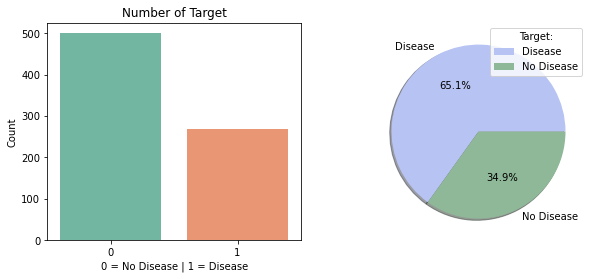

In [85]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x="Outcome", data=data, palette="Set2")
plt.title("Number of Target")
plt.xlabel("0 = No Disease | 1 = Disease")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
target_counts = data['Outcome'].value_counts()
plt.pie(target_counts.values, labels=["Disease", "No Disease"], shadow=True, autopct="%1.1f%%", colors=["#B7C3F3", "#8EB897"])
plt.legend(title="Target:")

plt.show()

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

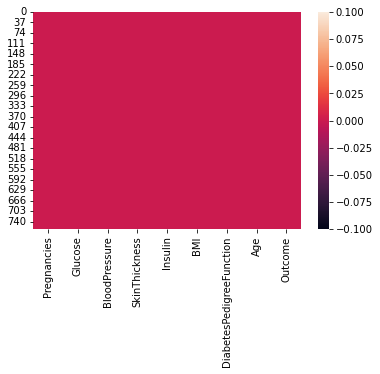

In [87]:
sns.heatmap(data.isnull())

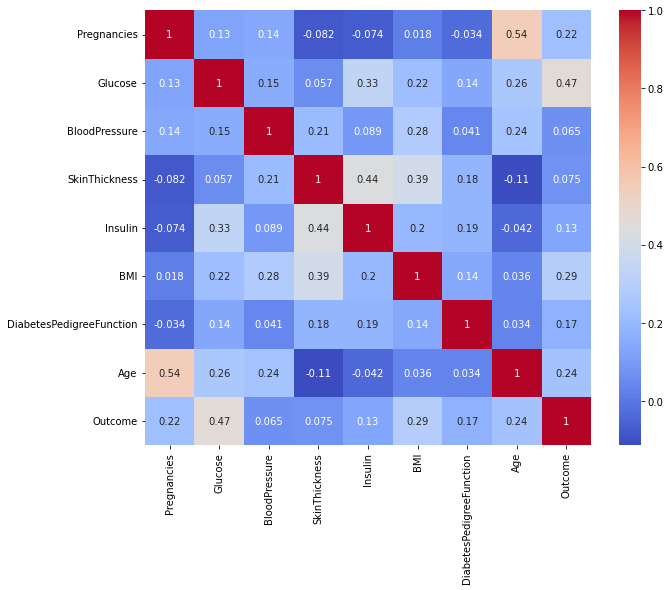

In [88]:
# Get the correlation matrix as a Pandas DataFrame

correlation_matrix = data.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**Number of Instances:** 768<br/>
**Number of Attributes:** 8 plus target/class<br/>
**For Each Attribute:** (all numeric-valued)

**Pregnancies:** Number of times pregnant <br/>
**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br/>
**BloodPressure:** Diastolic blood pressure (mm Hg)<br/>
**SkinThickness:** Triceps skin fold thickness (mm)<br/>
**Insulin:** 2-Hour serum insulin (mu U/ml)<br/>
**BMI:** Body mass index (weight in kg/(height in m)^2) <br/>
**DiabetesPedigreeFunction:** Diabetes pedigree function <br/>
**Age:** Age (years) <br/>
**Outcome:** Class variable (0 or 1)

In [89]:
#Feature Selection
x = data.drop(['SkinThickness','BloodPressure','Outcome'],axis=1)

x.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [90]:
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [92]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=20)

In [93]:
xtrain.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
446,1,100,70,25.3,0.658,28
260,3,191,130,30.9,0.299,34
570,3,78,0,32.5,0.270,39
590,11,111,0,46.8,0.925,45
30,5,109,0,36.0,0.546,60


In [94]:
ytrain.head()

446    0
260    0
570    0
590    1
30     0
Name: Outcome, dtype: int64

In [95]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [96]:
predictions = model.predict(xtest)

In [97]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [98]:
ytest.head()

143    1
14     1
504    0
557    0
736    0
Name: Outcome, dtype: int64

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [100]:
acc = accuracy_score(predictions,ytest)
cm = confusion_matrix(predictions,ytest)

In [101]:
acc

0.7727272727272727

In [102]:
cm

array([[91, 25],
       [10, 28]], dtype=int64)

In [103]:
from sklearn.metrics import classification_report

In [104]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       101
           1       0.74      0.53      0.62        53

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



# Decision Tree classifier

In [105]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [106]:
#Feature Selection
x = data.drop(['SkinThickness','BloodPressure','Outcome'],axis=1)

x.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [107]:
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [109]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=20)

In [110]:
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [111]:
pre = model.predict(xtest)

In [112]:
acc=accuracy_score(pre,ytest)
print("Accuracy: ",acc)
cm = confusion_matrix(pre,ytest)
print("Confusion Matrix: \n", cm)
print("Classification Report: \n")
print(classification_report(ytest,pre))

Accuracy:  0.6298701298701299
Confusion Matrix: 
 [[68 24]
 [33 29]]
Classification Report: 

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       101
           1       0.47      0.55      0.50        53

    accuracy                           0.63       154
   macro avg       0.60      0.61      0.60       154
weighted avg       0.65      0.63      0.64       154



# KNN Algorithm

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.metrics import classification_report

In [114]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [115]:
#Feature Selection
x = data.drop(['SkinThickness','BloodPressure','Outcome'],axis=1)

x.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [116]:
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [117]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

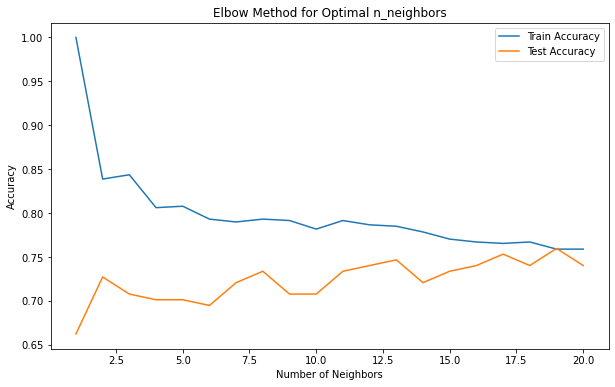

In [118]:
import numpy as np

# Calculate accuracy for different values of n_neighbors
neighbors = np.arange(1, 21)  # Test n_neighbors from 1 to 20
train_accuracy = []
test_accuracy = []

for n in neighbors:
    mdl = KNeighborsClassifier(n_neighbors=n)
    mdl.fit(xtrain, ytrain)
    train_accuracy.append(mdl.score(xtrain, ytrain))
    test_accuracy.append(mdl.score(xtest, ytest))

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracy, label="Train Accuracy")
plt.plot(neighbors, test_accuracy, label="Test Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Elbow Method for Optimal n_neighbors")
plt.legend()
plt.show()


In [119]:
mdl = KNeighborsClassifier(n_neighbors=3,p=2,metric='euclidean')
mdl.fit(xtrain,ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [120]:
prediction = mdl.predict(xtest)

In [121]:
print("Accuracy = ", accuracy_score(ytest,prediction))
print("\nConfusion Matrix\n",confusion_matrix(ytest,prediction))
print("\nF1-Score = ",f1_score(ytest,prediction))
print("\nClassification Report\n",classification_report(ytest,prediction))

Accuracy =  0.7077922077922078

Confusion Matrix
 [[80 23]
 [22 29]]

F1-Score =  0.5631067961165048

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       103
           1       0.56      0.57      0.56        51

    accuracy                           0.71       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



# Thank you Sir Usman Khan